In [5]:
#Reddit API Credentials
import praw
reddit = praw.Reddit(
    client_id='_GtjfqUP0K2gTDiEuUYJzg',  # replace 'YOUR_CLIENT_ID' with the client ID you got from Reddit
    client_secret='Gip79--yAqiuh-qOsd-Z8H9LVu0CsA',  # replace 'YOUR_CLIENT_SECRET' with the client secret you got from Reddit
    user_agent='script:reddit_data_extraction:v1.0 (by /u/birarimayuri04)',  # replace 'YourRedditUsername' with your Reddit username
    username='birarimayuri04',  # your Reddit username
    password='1234ABCDabcd'  # your Reddit password'
)

In [6]:

subreddit = reddit.subreddit('economy')


In [ ]:
#Creating dataframe out of the comments extracted from the posts
import praw
import pandas as pd

submission_ids = ['g8d7wf', 'gfsxat','izzkxh', 'jm20ar', 'kh7wi9', 'jyyai2', 'g72gph', 'uw5080','gabjbe','i3i4bz','tgjqxa']

comments_data = []
for sid in submission_ids:
    submission = reddit.submission(sid) 
    submission.comments.replace_more(limit=None)
    top_comments = submission.comments.list()[:100]
    

    for comment in top_comments:
        comments_data.append({
            'Submission_id': sid,
            'Comment ID': comment.id,
            'Author': str(comment.author),  
            'Score': comment.score,
            'Created UTC': comment.created_utc,
            'Body': comment.body
        })


df_comments = pd.df_commentsFrame(comments_df_comments)
df_comments.to_excel('reddit_comments.xlsx', index=False)

In [8]:
df_comments.head(5)

,Submission_id,Comment ID,Author,Score,Created UTC,Body,Sentiment
0,g72gph,foevrw4,Hamoodzstyle,102,1587716480,"Ah yes, that means stocks will rise Absolutely...",Positive
1,g72gph,fof8v0e,Goldtacto,17,1587729822,It bothers me that the mask is upside down.,Negative
2,g72gph,foffqn4,rrunning,21,1587734882,"I’m 36, and this is at least the 3rd separate ...",Positive
3,g72gph,foflqgr,jirfin,2,1587738493,You don’t say What a fantastic idea!,Positive
4,g72gph,fof8qlh,Tweakers,5,1587729718,Thanks Trump! /s This is really good!,Positive


In [14]:
from datetime import datetime
# Convert the 'Created UTC' column datetime
df_comments['Created UTC'] = pd.to_datetime(df_comments['Created UTC'], unit='s', utc=True)

df_comments['Created UTC'] = df_comments['Created UTC'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [4]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Load your df_comments
comments_df = pd.read_excel('reddit_comments.xlsx')

sia = SentimentIntensityAnalyzer()

# Function to apply sentiment analysis to the comments
def apply_vader_sentiment(text):
    scores = sia.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis to the 'Body' column of the comments df_commentsFrame
comments_df['Sentiment'] = comments_df['Body'].apply(apply_vader_sentiment)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
df_comments = pd.DataFrame(comments_df)
df_comments.to_excel('reddit_comments.xlsx', index=False)

In [17]:
df_comments.head(5)

,Submission_id,Comment ID,Author,Score,Created UTC,Body,Sentiment
0,g72gph,foevrw4,Hamoodzstyle,102,2020-04-24 08:21:20,"Ah yes, that means stocks will rise Absolutely...",Positive
1,g72gph,fof8v0e,Goldtacto,17,2020-04-24 12:03:42,It bothers me that the mask is upside down.,Negative
2,g72gph,foffqn4,rrunning,21,2020-04-24 13:28:02,"I’m 36, and this is at least the 3rd separate ...",Positive
3,g72gph,foflqgr,jirfin,2,2020-04-24 14:28:13,You don’t say What a fantastic idea!,Positive
4,g72gph,fof8qlh,Tweakers,5,2020-04-24 12:01:58,Thanks Trump! /s This is really good!,Positive


**# Percentage Change Over Time**

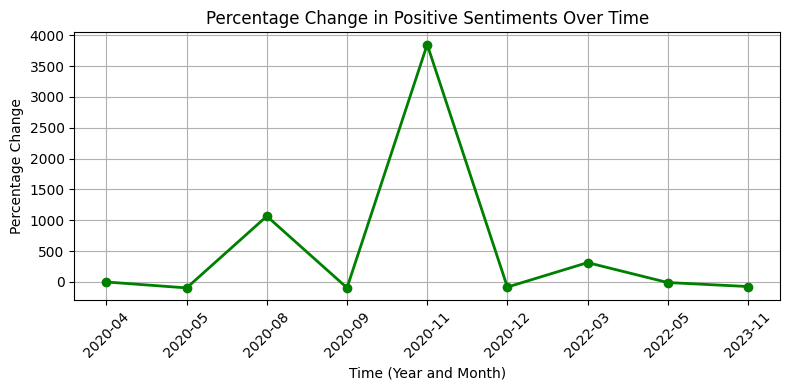

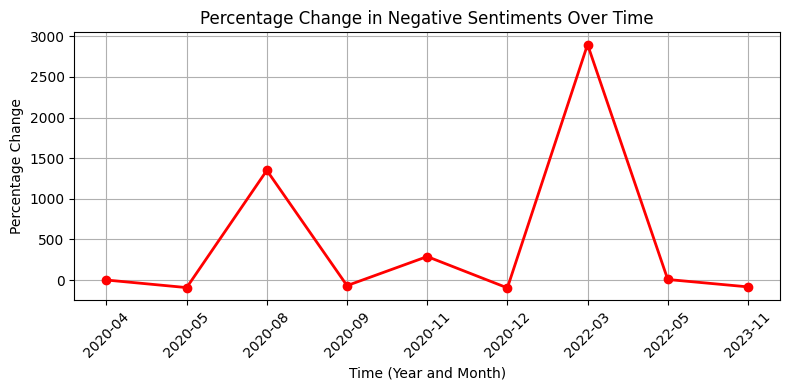

In [91]:

monthly_sentiment_count = df_comments.groupby(['YearMonth', 'Sentiment']).size().unstack(fill_value=0)[['Positive', 'Negative']]

monthly_sentiment_change = monthly_sentiment_count.pct_change().fillna(0) * 100  

positive_change = monthly_sentiment_change['Positive']
negative_change = monthly_sentiment_change['Negative']



plt.figure(figsize=(8,4))

plt.plot(positive_change.index.astype(str), positive_change, color='green', marker='o', linestyle='-', linewidth=2, markersize=6)


plt.title('Percentage Change in Positive Sentiments Over Time')
plt.xlabel('Time (Year and Month)')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))

plt.plot(negative_change.index.astype(str), negative_change, color='red', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title('Percentage Change in Negative Sentiments Over Time')
plt.xlabel('Time (Year and Month)')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:

df_comments = pd.read_excel('reddit_comments.xlsx')

**#Daily Ratio of Positive to Negative Sentiments**

In [10]:
import pandas as pd

if not isinstance(df_comments.index, pd.DatetimeIndex):
    df_comments['Created UTC'] = pd.to_datetime(df_comments['Created UTC'])
    df_comments.set_index('Created UTC', inplace=True)

df_comments.index


DatetimeIndex(['2020-04-24 08:21:20', '2020-04-24 12:03:42',
               '2020-04-24 13:28:02', '2020-04-24 14:28:13',
               '2020-04-24 12:01:58', '2020-04-24 18:31:14',
               '2020-04-24 15:15:34', '2020-04-24 20:47:52',
               '2020-04-24 09:01:38', '2020-04-24 14:46:55',
               ...
               '2022-05-24 02:00:35', '2022-05-23 20:51:48',
               '2022-05-23 19:39:42', '2022-05-23 18:56:18',
               '2022-05-23 19:13:43', '2022-05-25 06:47:27',
               '2022-05-24 16:59:19', '2022-05-24 21:37:36',
               '2022-05-24 11:55:34', '2023-11-03 04:06:00'],
              dtype='datetime64[ns]', name='Created UTC', length=599, freq=None)

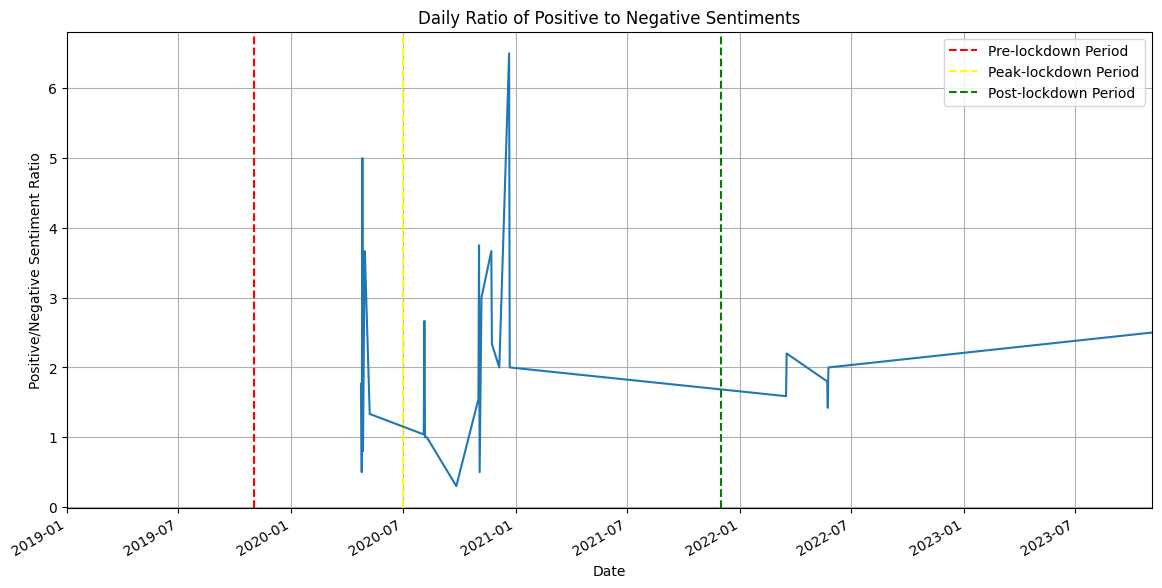

In [25]:
import matplotlib.pyplot as plt

from datetime import datetime
daily_sentiments = df_comments.groupby([pd.Grouper(freq='D'), 'Sentiment']).size().unstack().fillna(0)

daily_sentiments['Pos_Neg_Ratio'] = (daily_sentiments['Positive'] + 1) / (daily_sentiments['Negative'] + 1)

plt.figure(figsize=(14, 7))

plt.gca().set_xlim([datetime(2019, 1, 1), daily_sentiments.index.max()])

plt.axvline(datetime(2019, 11, 1), color='red', linestyle='--', label='Pre-lockdown Period')
plt.axvline(datetime(2020, 7, 1), color='yellow', linestyle='--', label='Peak-lockdown Period')
plt.axvline(datetime(2021, 12, 1), color='green', linestyle='--', label='Post-lockdown Period')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

daily_sentiments['Pos_Neg_Ratio'].plot(title='Daily Ratio of Positive to Negative Sentiments')
plt.xlabel('Date')
plt.ylabel('Positive/Negative Sentiment Ratio')
plt.grid(True)
plt.show()
